<a href="https://colab.research.google.com/github/PaulMRivera/Computational_physics/blob/master/Evaluation_2/Evaluacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import scipy.linalg as la
from scipy.integrate import odeint, solve_ivp
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
from scipy import integrate, linalg
#from datetime import datetime
import math
from math import exp, sqrt, pi




**Problema1.**

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) &lt; 0, x'(0) = 0$.

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$:

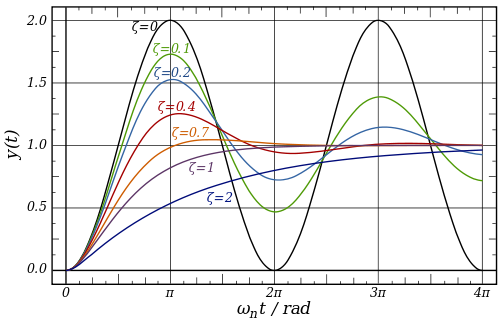

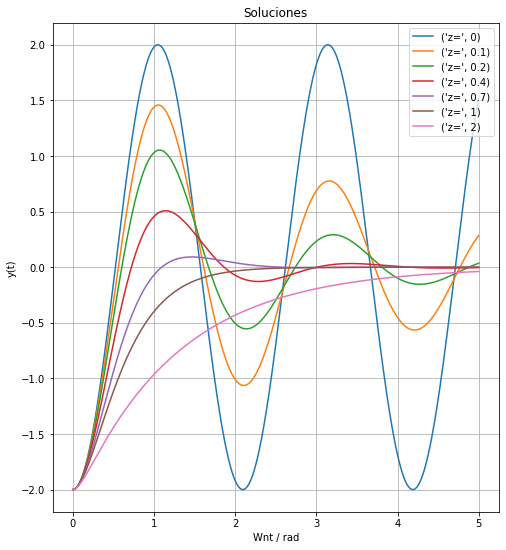

In [2]:
#F0= 0 
#Suponemos que 
m = 1 
k = 9 
#wn = np.sqrt(k/m)
wn = 3
#\zeta = z 
#c = coeficiente de viscocidad 
#z = c / ( 2 * sqrt(m/k))
#Pero como ya nos dan los valores de z entonces 
#z = 0,0.1,0.2,0.4,0.7,1,2
#Definimos a z como una lista
z = [0,0.1,0.2,0.4,0.7,1,2]
#Definimos a nuestra función 
def f(y,t,z,wn):
    x,v= y
    sol = [v,-2*z*wn*v-(wn**2)*x]
    return sol

#Condiciones iniciales 
y0 = [-2,0]
t=np.linspace(0,5,1000)
plt.figure(figsize=(8,9))
for d in z:
  y = odeint(f,y0,t,args=(d,wn))
  plt.plot(t, y[:,0], label=('z=',d))

plt.legend(loc='best')
plt.xlabel('Wnt / rad')
plt.ylabel('y(t)')
plt.title('Soluciones')
plt.grid()
plt.show()


**Problema 2.**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$).

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

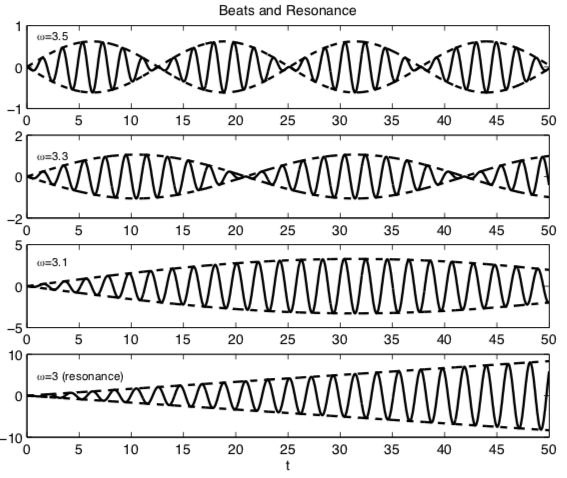

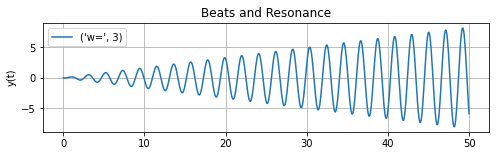

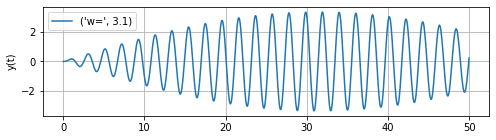

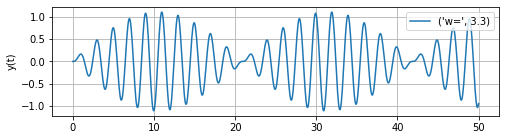

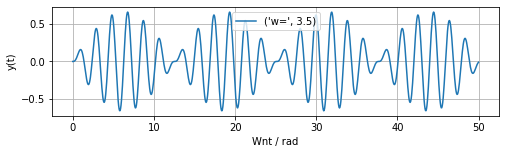

In [3]:
#Se nos dice que supongamos que 
F0 = 1 
m = 1
k = 9
#wn = np.sqrt(k/m)
wn = 3
#Definimos a w como una lista 
w = [3,3.1,3.3,3.5]
#Definimos a nuestra función 
def f(y,t,w):
    x,v = y 
    sol = [v,np.sin(w*t)-wn**2*x]
    return sol
#Condiciones iniciales
y0 = [0,0]
t=np.linspace(0,50,850)
#Hacemos el for para las graficas con los puntos deseados 
for d in w:
  
  plt.figure(figsize=(8,2))
  y = odeint(f,y0,t,args=(d,))
  plt.plot(t, y[:,0], label=('w=',d))
  plt.legend(loc='best')
  if d == 3.5:
    plt.xlabel('Wnt / rad')
  plt.ylabel('y(t)')
  if d == 3 : 
    plt.title('Beats and Resonance')
  plt.grid()
  plt.show()


**Problema 3.**

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$.

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.

In [10]:
def dxdt (X,t=0):
  return np.array([0*X[0]+1*X[1],
                   -1*wn**2*X[0]-2*zeta*wn*X[1]+(1/m)*f0*np.sin(w*t) ])

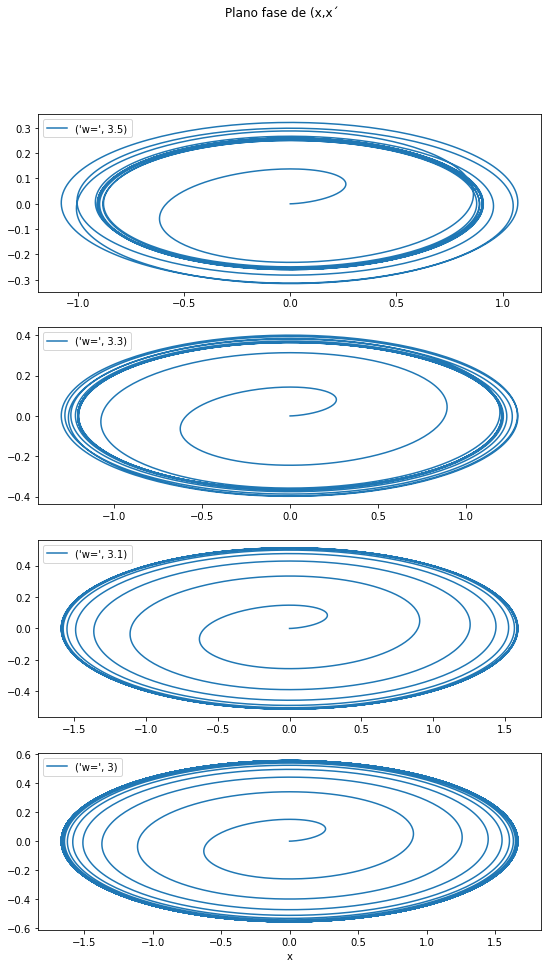

'Integration successful.'

In [11]:
##Problema 2
#Para este ejercicio 
zeta=0.1
f0=1
m=1
k=9
wn=np.sqrt(k/m)
#w va a variar

#Condiciones iniciales

y0=np.array([0,0])
t=np.linspace(0,50,5000)

fig, axs=plt.subplots(4,sharex=False)
fig.set_size_inches(9,15)

for w,i in zip([3.5,3.3,3.1,3],[0,1,2,3]):
  Y, infodict = integrate.odeint(dxdt,y0,t,full_output=True)
  y , x = Y.T #Y es la solucion de z y x es la de x'
  label='w=',w
  axs[i].plot(x,y,label=label)
  axs[i].legend(loc='upper left')
  

plt.xlabel('x')
fig.suptitle('Plano fase de (x,x´')
plt.show();
infodict['message']